In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def year2second(x):
    return x*31557600.0

def day2second(x):
    return x*86400

def second2day(x):
    return x/86400

def second2year(x):
    return x/31557600.0

def au2m(x):
    return x*au

def m2au(x):
    return x/au

def ubrzanje_3tela(x,y,z,xp,yp,zp,Ms,Mp, gama):
    #x,y,z - helicentricne koordinate objekta
    #xp,yp,zp - heliocentricne koordinate planete
    # Ms - masa Sunca
    # Mp - masa planete
    # gama - gravitaciona konstanta
    
    x_pc=x-xp
    y_pc=y-yp
    z_pc=z-zp
    
    r=(x ** 2 + y ** 2 + z ** 2)**(1/2) # helicenticni radijus vektor objekta
    r_pc=(x_pc ** 2 + y_pc ** 2 + z_pc** 2)**(1/2) # planetocentricni radijus vektor objekta


    ax = -gama * (Ms / r**3 * x + Mp / r_pc**3 * x_pc)
    ay = -gama * (Ms / r**3 * y + Mp / r_pc**3 * y_pc)
    az = -gama * (Ms / r**3 * z + Mp / r_pc**3 * z_pc)
    
    return ax, ay, az

gm=1.32712440018e20
au=149597870700.


# $\bf{\color{red}{\text {NUMERIČKA INTEGRACIJA DIFERENCIJALNIH JEDNAČINA}}}$
## Ojlerova i Ojler-Kromerova metoda

##$ {\color{blue}{\text {Zadatak:}}}$ Odrediti putanju tela zanemarljive mase pod uticajem Sunca

(-18.126546156318213, 2.025023217779458, -5.074198242143533, 6.00952102621863)

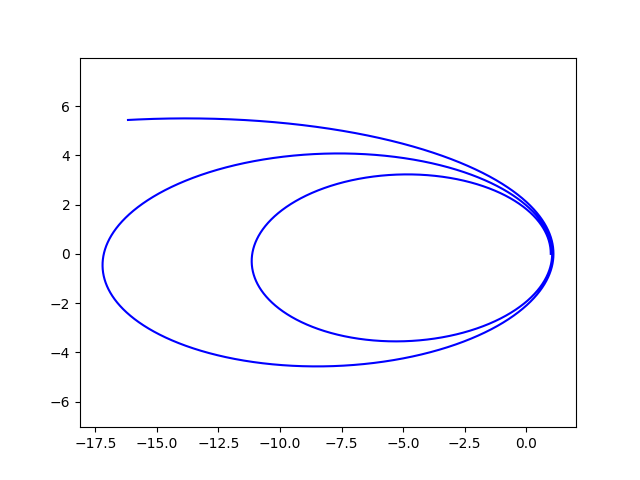

In [2]:
%matplotlib widget
#pocetni uslovi
x=[au2m(1)]
y=[0]
z=[0]

vx=[0.]
vy=[4e4]
vz=[0.]

# parametri integracije
t=year2second(50)
dt=day2second(1)

tt=0

while tt<t:
    
    r=np.sqrt(x[-1]**2+y[-1]**2+z[-1]**2) #trenutno heliocentrično rastojanje
    
    # komponente ubrzanja
    ax=-gm/r**3*x[-1]
    ay=-gm/r**3*y[-1]
    az=-gm/r**3*z[-1]
    
    # koordinate
    x.append(x[-1]+vx[-1]*dt)
    y.append(y[-1]+vy[-1]*dt)
    z.append(z[-1]+vz[-1]*dt)
    
    # brzine
    vx.append(vx[-1]+ax*dt)
    vy.append(vy[-1]+ay*dt)
    vz.append(vz[-1]+az*dt)
    
    # vreme
    tt=tt+dt
    
plt.plot(m2au(np.array(x)),m2au(np.array(y)),'b', label='Ojler')
plt.axis('equal')



## Ojler-Kromerova varijanta

In [3]:
#pocetni uslovi
x=[au2m(1)]
y=[0]
z=[0]

vx=[0.]
vy=[4e4]
vz=[0.]

tt=0
dt=day2second(1)
while tt<t:
    
    r=np.sqrt(x[-1]**2+y[-1]**2+z[-1]**2) #trenutno heliocentrično rastojanje
    
    # komponente ubrzanja
    ax=-gm/r**3*x[-1]
    ay=-gm/r**3*y[-1]
    az=-gm/r**3*z[-1]
    
    # brzine
    vx.append(vx[-1]+ax*dt)
    vy.append(vy[-1]+ay*dt)
    vz.append(vz[-1]+az*dt)
    
    # koordinate
    x.append(x[-1]+vx[-1]*dt)
    y.append(y[-1]+vy[-1]*dt)
    z.append(z[-1]+vz[-1]*dt)
    
    # vreme
    tt=tt+dt
    
plt.plot(m2au(np.array(x)),m2au(np.array(y)),'r', label='Ojler-Kromer')
plt.axis('equal')
plt.legend()

# $ {\color{blue}{\text {Zadatak:}}}$ Odrediti putanju tela zanemarljive mase pod uticajem Sunca i Zemlje

[149916770700.0]


Text(0.5, 0, 'z')

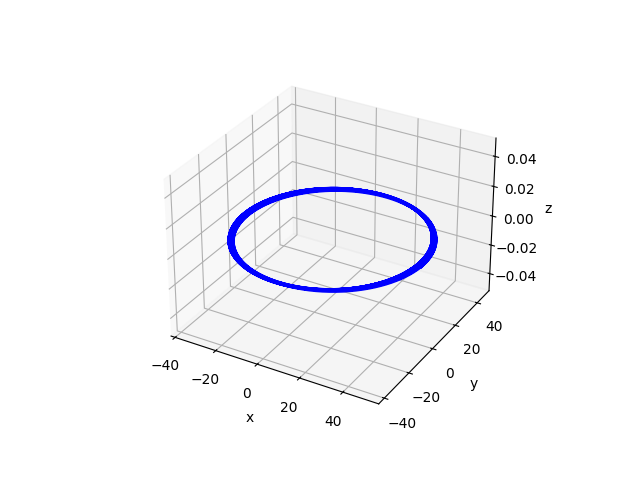

In [5]:
%matplotlib widget
Ms = 1.989e30 # masa Sunca
Mz=5.972e24 # masa Zemlje

gama = 6.67e-11 # gravitaciona konstanta

r0z = 6.378e6  # poluprecnik Zemlje
v_zemlja = 2 * np.pi * au2m(1.) / (365.25 * 86400)

v0 = 1e3 # pocetna brzina u odnosu na Zemlju

# pocetni uslovi (heliocentricni sistem)
x_hc = [au2m(1.) + 50 * r0z] # 50 Zemljinih poluprečnika od Zemlje
y_hc = [0]
z_hc = [0]
vx_hc = 0
vy_hc = v_zemlja+v0 # helicentrična brzina tela
vz_hc = 0

print(x_hc)





# koordinate Zemlje
xz = au2m(1.)
yz = 0
zz = 0

# ugaona brzina kretanja Zemlje oko Sunca
sk = 2 * np.pi / year2second(1.) # obiđe 2*pi za jednu godinu

# geocentrične koordinate objekta
x_gc = [x_hc[0] - xz]
y_gc = [y_hc[0] - yz]
z_gc = [z_hc[0] - zz]

dt = day2second(1/24/6) # korak integracije
t = 0. # početno vreme
while t < year2second(1):

    r_hc=(x_hc[-1] ** 2 + y_hc[-1] ** 2 + z_hc[-1] ** 2)**(1/2)
    r_gc=(x_gc[-1] ** 2 + y_gc[-1] ** 2 + z_gc[-1] ** 2)**(1/2)

    ax = -gama * (Ms / r_hc**3 * x_hc[-1] + Mz / r_gc**3 * x_gc[-1])
    ay = -gama * (Ms / r_hc**3 * y_hc[-1] + Mz / r_gc**3 * y_gc[-1])
    az = -gama * (Ms / r_hc**3 * z_hc[-1] + Mz / r_gc**3 * z_gc[-1])

    vx_hc += ax * dt
    vy_hc += ay * dt
    vz_hc += az * dt

    x_hc.append(x_hc[-1] + vx_hc * dt)
    y_hc.append(y_hc[-1] + vy_hc * dt)
    z_hc.append(z_hc[-1] + vz_hc * dt)

    lz = t * sk  # longituda Zemlje 

    # pravougle koordinate Zemlje
    xz = au2m(1.) * np.cos(lz)
    yz = au2m(1.) * np.sin(lz)

    # geocentricne koordinate objekta
    x_gc.append(x_hc[-1] - xz)
    y_gc.append(y_hc[-1] - yz)
    z_gc.append(z_hc[-1] - zz)
    
    t += dt


x_hc = np.array(x_hc)
y_hc = np.array(y_hc)
z_hc = np.array(z_hc)

x_gc = np.array(x_gc)
y_gc = np.array(y_gc)
z_gc = np.array(z_gc)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_gc/r0z,y_gc/r0z,z_gc/r0z, color='b', label='Ojler-Kromer')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# $\bf{\color{red}{\text {Runge-Kutta}}}$

In [6]:
# pocetni uslovi
x=au2m(1.) + 50 * r0z
y=0
z=0
vx=0
vy=v_zemlja+v0
vz=v0/2

# koordinate Zemlje
x_zemlja = au2m(1.)
y_zemlja = 0
z_zemlja = 0

# ugaona brzina kretanja Zemlje oko Sunca
sk = 2 * np.pi / year2second(1.) # obiđe 2*pi za jednu godinu

t = 0. # početno vreme

x_rk=[x-x_zemlja]
y_rk=[y-y_zemlja]
z_rk=[z-z_zemlja]


vreme=[0]

while t < year2second(1.):

    xx=x
    vxx=vx
    yy=y
    vyy=vy
    zz=z
    vzz=vz
    
    # 1. korak
    Kx_1=dt*vxx
    Kvx_1=dt*ubrzanje_3tela(xx,yy,zz,x_zemlja, y_zemlja, 0, Ms, Mz, gama)[0]
    Ky_1=dt*vyy
    Kvy_1=dt*ubrzanje_3tela(xx,yy,zz,x_zemlja, y_zemlja, 0, Ms, Mz, gama)[1]
    Kz_1=dt*vzz
    Kvz_1=dt*ubrzanje_3tela(xx,yy,zz,x_zemlja, y_zemlja, 0, Ms, Mz, gama)[2]
    
    xx=x+Kx_1/2
    vxx=vx+Kvx_1/2
    yy=y+Ky_1/2
    vyy=vy+Kvy_1/2
    zz=z+Kz_1/2
    vzz=vz+Kvz_1/2
    
    # 2. korak
    Kx_2=dt*vxx
    Kvx_2=dt*ubrzanje_3tela(xx,yy,zz,x_zemlja, y_zemlja, 0, Ms, Mz, gama)[0]
    Ky_2=dt*vyy
    Kvy_2=dt*ubrzanje_3tela(xx,yy,zz,x_zemlja, y_zemlja, 0, Ms, Mz, gama)[1]
    Kz_2=dt*vzz
    Kvz_2=dt*ubrzanje_3tela(xx,yy,zz,x_zemlja, y_zemlja, 0, Ms, Mz, gama)[2]
    
    xx=x+Kx_2/2
    vxx=vx+Kvx_2/2
    yy=y+Ky_2/2
    vyy=vy+Kvy_2/2
    zz=z+Kz_2/2
    vzz=vz+Kvz_2/2
    
    # 3. korak
    Kx_3=dt*vxx
    Kvx_3=dt*ubrzanje_3tela(xx,yy,zz,x_zemlja, y_zemlja, 0, Ms, Mz, gama)[0]
    Ky_3=dt*vyy
    Kvy_3=dt*ubrzanje_3tela(xx,yy,zz,x_zemlja, y_zemlja, 0, Ms, Mz, gama)[1]
    Kz_3=dt*vzz
    Kvz_3=dt*ubrzanje_3tela(xx,yy,zz,x_zemlja, y_zemlja, 0, Ms, Mz, gama)[2]
    
    xx=x+Kx_3
    vxx=vx+Kvx_3
    yy=y+Ky_3
    vyy=vy+Kvy_3
    zz=z+Kz_3
    vzz=vz+Kvz_3
    
    # 4. korak
    Kx_4=dt*vxx
    Kvx_4=dt*ubrzanje_3tela(xx,yy,zz,x_zemlja, y_zemlja, 0, Ms, Mz, gama)[0]
    Ky_4=dt*vyy
    Kvy_4=dt*ubrzanje_3tela(xx,yy,zz,x_zemlja, y_zemlja, 0, Ms, Mz, gama)[1]
    Kz_4=dt*vzz
    Kvz_4=dt*ubrzanje_3tela(xx,yy,zz,x_zemlja, y_zemlja, 0, Ms, Mz, gama)[2]

    # racunanje koeficijenata K
    Kx=1/6*(Kx_1+2*Kx_2+2*Kx_3+Kx_4)
    Kvx=1/6*(Kvx_1+2*Kvx_2+2*Kvx_3+Kvx_4)
    
    Ky=1/6*(Ky_1+2*Ky_2+2*Ky_3+Ky_4)
    Kvy=1/6*(Kvy_1+2*Kvy_2+2*Kvy_3+Kvy_4)
    
    Kz=1/6*(Kz_1+2*Kz_2+2*Kz_3+Kz_4)
    Kvz=1/6*(Kvz_1+2*Kvz_2+2*Kvz_3+Kvz_4)
    
    x=x+Kx
    vx=vx+Kvx
    
    y=y+Ky
    vy=vy+Kvy
    
    z=z+Kz
    vz=vz+Kvz
    
    # geocentrične koordinate
    x_rk.append(x-x_zemlja)
    y_rk.append(y-y_zemlja)
    z_rk.append(z-z_zemlja)

    
    lz = t * sk  # longituda Zemlje 

    # pravougle koordinate Zemlje
    x_zemlja = au2m(1.) * np.cos(lz)
    y_zemlja = au2m(1.) * np.sin(lz)
    
    t+=dt
    vreme.append(t)
    
    

ax.plot(np.array(x_rk)/r0z,np.array(y_rk)/r0z,np.array(z_rk)/r0z, color='r', label='Runge-Kutta')
ax.legend()



## Odstupanje putanja računatih Ojler-Kromerovom metodom i Runge-Kutta metodom

In [11]:
%matplotlib widget

dx=np.array(x_rk)-x_gc
dy=np.array(y_rk)-y_gc
dz=np.array(z_rk)-z_gc

d=np.sqrt(dx**2+dy**2+dz**2)

plt.plot(second2day(np.array(vreme)),d/1000)
plt.xlabel('time')
plt.ylabel('d [km]')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'd [km]')

Uporedjivanje Runge kuta i ojlera za 3 tela (razlika orbita i vreme izracunavanja)

Uporediti oba sa analitickim resenjem za dva tela (takodje i brzinu)